In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./covertype.csv');
y = df.iloc[:,(df.shape)[1]-1];
x = df.iloc[:,1:11]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3);


### Training a simple deep neural network

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

number_of_classes = 8

model = Sequential();
model.add(Dense(10, input_dim=10, activation='sigmoid'));
model.add(Dense(10, input_dim=10, activation='sigmoid'));
model.add(Dense(number_of_classes, activation='softmax'));


model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam');

history = model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=0);


Using TensorFlow backend.


In [32]:
import numpy as np

np.unique(y_test)


array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

### Train again

In [33]:
history = model.fit(x_train, y_train, epochs=4000, batch_size=100, verbose=0);

### Inspect the data

In [34]:
import numpy as np

stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

for col in x.columns:
    stats.loc[col] = { "Type": df.loc[:, col].dtype,
                       "Min": df.loc[:, col].min(),
                       "Max": df.loc[:, col].max(),
                       "Mean": df.loc[:, col].mean(),
                       "Std": np.std(df.loc[:, col], ddof=1) #df.loc[:, col].std() ddof to make numpy behave the same as panda
                      }

display(stats)

,Type,Min,Max,Mean,Std
Elevation,int64,1863,3849,2749.322553,417.678187
Aspect,int64,0,360,156.676653,110.085801
Slope,int64,0,52,16.501587,8.453927
Horizontal_Distance_To_Hydrology,int64,0,1343,227.195701,210.075296
Vertical_Distance_To_Hydrology,int64,-146,554,51.076521,61.239406
Horizontal_Distance_To_Roadways,int64,0,6890,1714.023214,1325.066358
Hillshade_9am,int64,0,254,212.704299,30.561287
Hillshade_Noon,int64,99,254,218.965608,22.801966
Hillshade_3pm,int64,0,248,135.091997,45.895189
Horizontal_Distance_To_Fire_Points,int64,0,6993,1511.147288,1099.936493


### Preprocess the Data

In [5]:
##preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1));
rescaledX = scaler.fit_transform(x_train);

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam');
history = model.fit(rescaledX, y_train, epochs=4000, batch_size=100);

##Save model


C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Epoch 1/4000
10584/10584 [==============================] - 0s 39us/step - loss: 2.5305 - acc: 0.1520
Epoch 2/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.8543 - acc: 0.2483
Epoch 3/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.7956 - acc: 0.3043
Epoch 4/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.7544 - acc: 0.3205
Epoch 5/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.7073 - acc: 0.3413
Epoch 6/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.6572 - acc: 0.3495
Epoch 7/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.6091 - acc: 0.3591
Epoch 8/4000
10584/10584 [==============================] - 0s 15us/step - loss: 1.5661 - acc: 0.3647
Epoch 9/4000
10584/10584 [==============================] - 0s 14us/step - loss: 1.5287 - acc: 0.3804
Epoch 10/4000
10584/10584 [==============================] - 0s 14us/step - loss: 

10584/10584 [==============================] - 0s 18us/step - loss: 0.8387 - acc: 0.6329
Epoch 158/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8384 - acc: 0.6316
Epoch 159/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8379 - acc: 0.6350
Epoch 160/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8377 - acc: 0.6334
Epoch 161/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8370 - acc: 0.6333
Epoch 162/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8365 - acc: 0.6329
Epoch 163/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8359 - acc: 0.6362
Epoch 164/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8355 - acc: 0.6353
Epoch 165/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.8352 - acc: 0.6350
Epoch 166/4000
10584/10584 [==============================] - 0s 16us/step - lo

10584/10584 [==============================] - 0s 15us/step - loss: 0.7809 - acc: 0.6698
Epoch 314/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7808 - acc: 0.6707
Epoch 315/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7805 - acc: 0.6700
Epoch 316/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7804 - acc: 0.6720
Epoch 317/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7797 - acc: 0.6704
Epoch 318/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.7797 - acc: 0.6701
Epoch 319/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7797 - acc: 0.6718
Epoch 320/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7790 - acc: 0.6726
Epoch 321/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7790 - acc: 0.6716
Epoch 322/4000
10584/10584 [==============================] - 0s 14us/step - lo

10584/10584 [==============================] - 0s 16us/step - loss: 0.7549 - acc: 0.6775
Epoch 469/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7554 - acc: 0.6785
Epoch 470/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7544 - acc: 0.6781
Epoch 471/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7553 - acc: 0.6794
Epoch 472/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7545 - acc: 0.6748
Epoch 473/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.7544 - acc: 0.6773
Epoch 474/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7542 - acc: 0.6779
Epoch 475/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7546 - acc: 0.6766
Epoch 476/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.7549 - acc: 0.6782
Epoch 477/4000
10584/10584 [==============================] - 0s 16us/step - lo

10584/10584 [==============================] - 0s 16us/step - loss: 0.7372 - acc: 0.6845
Epoch 623/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.7376 - acc: 0.6847
Epoch 624/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7370 - acc: 0.6824
Epoch 625/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.7373 - acc: 0.6851
Epoch 626/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7370 - acc: 0.6826
Epoch 627/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.7371 - acc: 0.6854
Epoch 628/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.7365 - acc: 0.6839
Epoch 629/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.7362 - acc: 0.6847
Epoch 630/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.7364 - acc: 0.6847
Epoch 631/4000
10584/10584 [==============================] - 0s 16us/step - lo

10584/10584 [==============================] - 0s 15us/step - loss: 0.7224 - acc: 0.6899
Epoch 779/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7223 - acc: 0.6910
Epoch 780/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.7216 - acc: 0.6896
Epoch 781/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7213 - acc: 0.6896
Epoch 782/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.7220 - acc: 0.6911
Epoch 783/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.7215 - acc: 0.6900
Epoch 784/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.7214 - acc: 0.6897
Epoch 785/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.7213 - acc: 0.6899
Epoch 786/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.7208 - acc: 0.6895
Epoch 787/4000
10584/10584 [==============================] - 0s 20us/step - lo

10584/10584 [==============================] - 0s 17us/step - loss: 0.7086 - acc: 0.6929
Epoch 934/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7086 - acc: 0.6912
Epoch 935/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7085 - acc: 0.6943
Epoch 936/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7082 - acc: 0.6922
Epoch 937/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.7084 - acc: 0.6910
Epoch 938/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.7087 - acc: 0.6901
Epoch 939/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7085 - acc: 0.6918
Epoch 940/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7086 - acc: 0.6924
Epoch 941/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.7085 - acc: 0.6919
Epoch 942/4000
10584/10584 [==============================] - 0s 16us/step - lo

10584/10584 [==============================] - 0s 16us/step - loss: 0.6974 - acc: 0.6922
Epoch 1089/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6975 - acc: 0.6952
Epoch 1090/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6972 - acc: 0.6962
Epoch 1091/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6977 - acc: 0.6980
Epoch 1092/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6975 - acc: 0.6965
Epoch 1093/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6971 - acc: 0.6968
Epoch 1094/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6977 - acc: 0.6964
Epoch 1095/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6972 - acc: 0.6980
Epoch 1096/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6973 - acc: 0.6976
Epoch 1097/4000
10584/10584 [==============================] - 0s 18us/

Epoch 1165/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6928 - acc: 0.6992
Epoch 1166/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6921 - acc: 0.6987
Epoch 1167/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6924 - acc: 0.6998
Epoch 1168/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6927 - acc: 0.6986
Epoch 1169/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6926 - acc: 0.6991
Epoch 1170/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6932 - acc: 0.6987
Epoch 1171/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6921 - acc: 0.7002
Epoch 1172/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6922 - acc: 0.6996
Epoch 1173/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6920 - acc: 0.7000
Epoch 1174/4000
10584/10584 [==========================

Epoch 1319/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6842 - acc: 0.7034
Epoch 1320/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6839 - acc: 0.7026
Epoch 1321/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6840 - acc: 0.7029
Epoch 1322/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6847 - acc: 0.7047
Epoch 1323/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6842 - acc: 0.7036
Epoch 1324/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6856 - acc: 0.7011
Epoch 1325/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6844 - acc: 0.7062
Epoch 1326/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6842 - acc: 0.7038
Epoch 1327/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6838 - acc: 0.7036
Epoch 1328/4000
10584/10584 [==========================

10584/10584 [==============================] - 0s 17us/step - loss: 0.6802 - acc: 0.7059
Epoch 1398/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6804 - acc: 0.7046
Epoch 1399/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6807 - acc: 0.7055
Epoch 1400/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6805 - acc: 0.7057
Epoch 1401/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6802 - acc: 0.7063
Epoch 1402/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6797 - acc: 0.7057
Epoch 1403/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6804 - acc: 0.7073
Epoch 1404/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6798 - acc: 0.7060
Epoch 1405/4000
10584/10584 [==============================] - 0s 21us/step - loss: 0.6800 - acc: 0.7054
Epoch 1406/4000
10584/10584 [==============================] - 0s 16us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6741 - acc: 0.7103
Epoch 1553/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6735 - acc: 0.7071
Epoch 1554/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6740 - acc: 0.7094
Epoch 1555/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6734 - acc: 0.7100
Epoch 1556/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6731 - acc: 0.7105
Epoch 1557/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6741 - acc: 0.7098
Epoch 1558/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6739 - acc: 0.7098
Epoch 1559/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6734 - acc: 0.7096
Epoch 1560/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6731 - acc: 0.7100
Epoch 1561/4000
10584/10584 [==============================] - 0s 18us/

10584/10584 [==============================] - 0s 12us/step - loss: 0.6675 - acc: 0.7131
Epoch 1707/4000
10584/10584 [==============================] - 0s 10us/step - loss: 0.6683 - acc: 0.7119
Epoch 1708/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6681 - acc: 0.7143
Epoch 1709/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6679 - acc: 0.7122
Epoch 1710/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6684 - acc: 0.7135
Epoch 1711/4000
10584/10584 [==============================] - 0s 11us/step - loss: 0.6676 - acc: 0.7139
Epoch 1712/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6677 - acc: 0.7121
Epoch 1713/4000
10584/10584 [==============================] - 0s 21us/step - loss: 0.6678 - acc: 0.7124
Epoch 1714/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6675 - acc: 0.7126
Epoch 1715/4000
10584/10584 [==============================] - 0s 12us/

10584/10584 [==============================] - 0s 15us/step - loss: 0.6629 - acc: 0.7155
Epoch 1862/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6629 - acc: 0.7157
Epoch 1863/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6634 - acc: 0.7166
Epoch 1864/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6633 - acc: 0.7153
Epoch 1865/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6631 - acc: 0.7150
Epoch 1866/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6625 - acc: 0.7167
Epoch 1867/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6628 - acc: 0.7140
Epoch 1868/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6627 - acc: 0.7172
Epoch 1869/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6629 - acc: 0.7147
Epoch 1870/4000
10584/10584 [==============================] - 0s 13us/

10584/10584 [==============================] - 0s 17us/step - loss: 0.6591 - acc: 0.7170
Epoch 2018/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6587 - acc: 0.7170
Epoch 2019/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6592 - acc: 0.7190
Epoch 2020/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6591 - acc: 0.7169
Epoch 2021/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6589 - acc: 0.7161
Epoch 2022/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6589 - acc: 0.7171
Epoch 2023/4000
10584/10584 [==============================] - 0s 10us/step - loss: 0.6591 - acc: 0.7170
Epoch 2024/4000
10584/10584 [==============================] - 0s 12us/step - loss: 0.6585 - acc: 0.7164
Epoch 2025/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6589 - acc: 0.7175
Epoch 2026/4000
10584/10584 [==============================] - 0s 18us/

10584/10584 [==============================] - 0s 20us/step - loss: 0.6557 - acc: 0.7198
Epoch 2172/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6555 - acc: 0.7178
Epoch 2173/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6559 - acc: 0.7193
Epoch 2174/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6554 - acc: 0.7174
Epoch 2175/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6562 - acc: 0.7196
Epoch 2176/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6556 - acc: 0.7195
Epoch 2177/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6552 - acc: 0.7186
Epoch 2178/4000
10584/10584 [==============================] - 0s 21us/step - loss: 0.6553 - acc: 0.7193
Epoch 2179/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6563 - acc: 0.7208
Epoch 2180/4000
10584/10584 [==============================] - 0s 17us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6531 - acc: 0.7211
Epoch 2327/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6529 - acc: 0.7206
Epoch 2328/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6530 - acc: 0.7202
Epoch 2329/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6530 - acc: 0.7224
Epoch 2330/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6531 - acc: 0.7200
Epoch 2331/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6534 - acc: 0.7214
Epoch 2332/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6533 - acc: 0.7221
Epoch 2333/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6524 - acc: 0.7212
Epoch 2334/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6533 - acc: 0.7194
Epoch 2335/4000
10584/10584 [==============================] - 0s 18us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6505 - acc: 0.7239
Epoch 2481/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6509 - acc: 0.7213
Epoch 2482/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6504 - acc: 0.7212
Epoch 2483/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6502 - acc: 0.7196
Epoch 2484/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6507 - acc: 0.7217
Epoch 2485/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6505 - acc: 0.7223
Epoch 2486/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6507 - acc: 0.7210
Epoch 2487/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6502 - acc: 0.7213
Epoch 2488/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6504 - acc: 0.7206
Epoch 2489/4000
10584/10584 [==============================] - 0s 14us/

10584/10584 [==============================] - 0s 17us/step - loss: 0.6489 - acc: 0.7224
Epoch 2635/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6483 - acc: 0.7222
Epoch 2636/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6484 - acc: 0.7223
Epoch 2637/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6484 - acc: 0.7234
Epoch 2638/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6488 - acc: 0.7230
Epoch 2639/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6487 - acc: 0.7231
Epoch 2640/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6493 - acc: 0.7223
Epoch 2641/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6485 - acc: 0.7223
Epoch 2642/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6486 - acc: 0.7234
Epoch 2643/4000
10584/10584 [==============================] - 0s 15us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6470 - acc: 0.7230
Epoch 2789/4000
10584/10584 [==============================] - 0s 22us/step - loss: 0.6470 - acc: 0.7224
Epoch 2790/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6468 - acc: 0.7233
Epoch 2791/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6470 - acc: 0.7230
Epoch 2792/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6469 - acc: 0.7223
Epoch 2793/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6465 - acc: 0.7235
Epoch 2794/4000
10584/10584 [==============================] - 0s 23us/step - loss: 0.6465 - acc: 0.7221
Epoch 2795/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6465 - acc: 0.7244
Epoch 2796/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6470 - acc: 0.7241
Epoch 2797/4000
10584/10584 [==============================] - 0s 21us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6449 - acc: 0.7237
Epoch 2943/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6450 - acc: 0.7243
Epoch 2944/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6448 - acc: 0.7238
Epoch 2945/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6447 - acc: 0.7235
Epoch 2946/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6448 - acc: 0.7249
Epoch 2947/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6449 - acc: 0.7247
Epoch 2948/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6446 - acc: 0.7252
Epoch 2949/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6455 - acc: 0.7247
Epoch 2950/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6451 - acc: 0.7229
Epoch 2951/4000
10584/10584 [==============================] - 0s 14us/

10584/10584 [==============================] - 0s 17us/step - loss: 0.6438 - acc: 0.7262
Epoch 3097/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6437 - acc: 0.7241
Epoch 3098/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6437 - acc: 0.7255
Epoch 3099/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6429 - acc: 0.7256
Epoch 3100/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6431 - acc: 0.7251
Epoch 3101/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6433 - acc: 0.7235
Epoch 3102/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6430 - acc: 0.7237
Epoch 3103/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6433 - acc: 0.7245
Epoch 3104/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6429 - acc: 0.7263
Epoch 3105/4000
10584/10584 [==============================] - 0s 14us/

10584/10584 [==============================] - 0s 15us/step - loss: 0.6414 - acc: 0.7258
Epoch 3250/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6415 - acc: 0.7262
Epoch 3251/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6419 - acc: 0.7253
Epoch 3252/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6419 - acc: 0.7256
Epoch 3253/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6415 - acc: 0.7243
Epoch 3254/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6421 - acc: 0.7265
Epoch 3255/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6418 - acc: 0.7241
Epoch 3256/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6427 - acc: 0.7252
Epoch 3257/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6414 - acc: 0.7268
Epoch 3258/4000
10584/10584 [==============================] - 0s 17us/

10584/10584 [==============================] - 0s 17us/step - loss: 0.6406 - acc: 0.7272
Epoch 3404/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6403 - acc: 0.7247
Epoch 3405/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6403 - acc: 0.7284
Epoch 3406/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6406 - acc: 0.7291
Epoch 3407/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6402 - acc: 0.7271
Epoch 3408/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6405 - acc: 0.7269
Epoch 3409/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6405 - acc: 0.7274
Epoch 3410/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6404 - acc: 0.7279
Epoch 3411/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6403 - acc: 0.7264
Epoch 3412/4000
10584/10584 [==============================] - 0s 16us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6399 - acc: 0.7263
Epoch 3481/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6401 - acc: 0.7278
Epoch 3482/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6398 - acc: 0.7268
Epoch 3483/4000
10584/10584 [==============================] - 0s 16us/step - loss: 0.6396 - acc: 0.7270
Epoch 3484/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6393 - acc: 0.7267
Epoch 3485/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6395 - acc: 0.7261
Epoch 3486/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6397 - acc: 0.7273
Epoch 3487/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6397 - acc: 0.7273
Epoch 3488/4000
10584/10584 [==============================] - 0s 20us/step - loss: 0.6394 - acc: 0.7285
Epoch 3489/4000
10584/10584 [==============================] - 0s 20us/

10584/10584 [==============================] - 0s 19us/step - loss: 0.6385 - acc: 0.7274
Epoch 3635/4000
10584/10584 [==============================] - 0s 22us/step - loss: 0.6385 - acc: 0.7263
Epoch 3636/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6381 - acc: 0.7290
Epoch 3637/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6381 - acc: 0.7288
Epoch 3638/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6384 - acc: 0.7275
Epoch 3639/4000
10584/10584 [==============================] - 0s 17us/step - loss: 0.6383 - acc: 0.7283
Epoch 3640/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6383 - acc: 0.7273
Epoch 3641/4000
10584/10584 [==============================] - 0s 22us/step - loss: 0.6380 - acc: 0.7260
Epoch 3642/4000
10584/10584 [==============================] - 0s 18us/step - loss: 0.6389 - acc: 0.7287
Epoch 3643/4000
10584/10584 [==============================] - 0s 16us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6369 - acc: 0.7305
Epoch 3789/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6371 - acc: 0.7279
Epoch 3790/4000
10584/10584 [==============================] - 0s 13us/step - loss: 0.6370 - acc: 0.7294
Epoch 3791/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6371 - acc: 0.7302
Epoch 3792/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6371 - acc: 0.7302
Epoch 3793/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6371 - acc: 0.7297
Epoch 3794/4000
10584/10584 [==============================] - 0s 19us/step - loss: 0.6371 - acc: 0.7280
Epoch 3795/4000
10584/10584 [==============================] - 0s 23us/step - loss: 0.6377 - acc: 0.7285
Epoch 3796/4000
10584/10584 [==============================] - 0s 24us/step - loss: 0.6372 - acc: 0.7277
Epoch 3797/4000
10584/10584 [==============================] - 0s 18us/

10584/10584 [==============================] - 0s 16us/step - loss: 0.6358 - acc: 0.7298
Epoch 3944/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6359 - acc: 0.7295
Epoch 3945/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6360 - acc: 0.7283
Epoch 3946/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6354 - acc: 0.7280
Epoch 3947/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6364 - acc: 0.7296
Epoch 3948/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6358 - acc: 0.7291
Epoch 3949/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6362 - acc: 0.7290
Epoch 3950/4000
10584/10584 [==============================] - 0s 15us/step - loss: 0.6356 - acc: 0.7304
Epoch 3951/4000
10584/10584 [==============================] - 0s 14us/step - loss: 0.6358 - acc: 0.7284
Epoch 3952/4000
10584/10584 [==============================] - 0s 14us/

### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [16]:
import numpy as np

stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

#read stats from new data
#np.savetxt('preprocessed_data.csv', rescaledX, delimiter=',')
new_data = pd.read_csv('./preprocessed_data.csv')
x = new_data.iloc[1:,:]
for col in x.columns:
    #print(x.columns)
    stats.loc[col] = { "Type": x.loc[:, col].dtype,
                       "Min": x.loc[:, col].min(),
                       "Max": x.loc[:, col].max(),
                       "Mean": x.loc[:, col].mean(),
                       "Std": x.loc[:, col].std()
                      }


display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,0.0,1.0,0.447299,0.209740
Aspect,float64,0.0,1.0,0.433496,0.306129
Slope,float64,0.0,1.0,0.336200,0.172959
Horizontal_Distance_To_Hydrology,float64,0.0,1.0,0.170343,0.155937
Vertical_Distance_To_Hydrology,float64,0.0,1.0,0.284928,0.088196
Horizontal_Distance_To_Roadways,float64,0.0,1.0,0.248976,0.192011
Hillshade_9am,float64,0.0,1.0,0.788520,0.155374
Hillshade_Noon,float64,0.0,1.0,0.774318,0.147598
Hillshade_3pm,float64,0.0,1.0,0.545749,0.184475
Horizontal_Distance_To_Fire_Points,float64,0.0,1.0,0.221277,0.161113


### Train the network again
- Reinitialize or redefine your MLP from above and train it again


In [9]:
from sklearn.preprocessing import MinMaxScaler

rescaled_test_X = scaler.fit_transform(x_test);

history = model.fit(rescaledX, y_train, validation_data=(rescaled_test_X,y_test), epochs=4000, batch_size=100, verbose=0);


C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Visualize the training

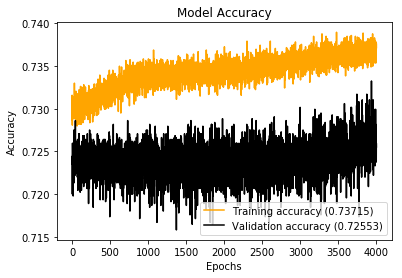

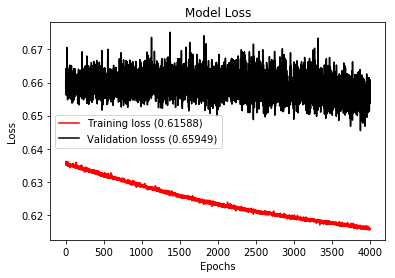

In [17]:
import matplotlib.pyplot as plt

##print(history.history.keys())
##Training and Validation Accuracy
plt.plot(history.history['acc'], 'orange', label='Training accuracy (' + str(format(history.history['acc'][-1],'.5f'))+')')
plt.plot(history.history['val_acc'], 'black', label='Validation accuracy (' + str(format(history.history['val_acc'][-1],'.5f'))+')')    
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    
##Training and Validation Loss
plt.plot(history.history['loss'], 'red', label='Training loss (' + str(format(history.history['loss'][-1],'.5f'))+')')
plt.plot(history.history['val_loss'], 'black', label='Validation losss (' + str(format(history.history['val_loss'][-1],'.5f'))+')')    
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
    